In [ ]:
## Green Cars- Data Science Course Final Project

## Load Packages

In [328]:
library("dplyr")
library("tidyr")
library("readxl")
library('ggplot2')

## Load Data Set

In [329]:
Green_cars= read.csv("C:/Users/laran/Documents/DataScience Course/Electric_Vehicle_Population_Data.csv")

In [330]:
head(Green_cars)

,VIN..1.10.,County,City,State,Postal.Code,Model.Year,Make,Model,Electric.Vehicle.Type,Clean.Alternative.Fuel.Vehicle..CAFV..Eligibility,Electric.Range,Base.MSRP,Legislative.District,DOL.Vehicle.ID,Vehicle.Location,Electric.Utility,X2020.Census.Tract
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,WP0AB2Y13M,Thurston,Olympia,WA,98513,2021,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203,0,2,156659646,POINT (-122.751179 47.002092),PUGET SOUND ENERGY INC,53067012331
2,1N4BZ1CP0K,Grant,Quincy,WA,98848,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,150,0,12,157077469,POINT (-119.830891 47.164101),PUD NO 2 OF GRANT COUNTY,53025011200
3,1G1FX6S06J,Skagit,Mount Vernon,WA,98274,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,10,250701013,POINT (-122.250701 48.368138),PUGET SOUND ENERGY INC,53057952700
4,JTDKAMFP3M,Yakima,Yakima,WA,98902,2021,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14,156585922,POINT (-120.532719 46.59458),,53077001000
5,1N4AZ1CP4L,Snohomish,Everett,WA,98208,2020,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,149,0,44,128498779,POINT (-122.19615 47.894423),PUGET SOUND ENERGY INC,53061052120
6,5YJSA1S2XF,Grant,Moses Lake,WA,98837,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,13,132461094,POINT (-119.280576 47.149471),PUD NO 2 OF GRANT COUNTY,53025011002


In [331]:
Green_cars1=filter(Green_cars,Electric.Range!=0)

## Subsetting Data

## Creating Subset to run Single Linear Regression

In [332]:
Subset1=c("Model.Year","DOL.Vehicle.ID")
Green_cars2=Green_cars[Subset1]

In [333]:
head(Green_cars2)

,Model.Year,DOL.Vehicle.ID
,<int>,<int>
1,2021,156659646
2,2019,157077469
3,2018,250701013
4,2021,156585922
5,2020,128498779
6,2015,132461094


In [334]:
Green_cars3=Green_cars2 %>% group_by(Model.Year) %>% summarize(Car_count = n())

In [335]:
View(Green_cars3)

Model.Year,Car_count
<int>,<int>
1993,1
1998,1
1999,3
2000,10
2002,2
2008,24
2010,25
2011,856
2012,1721


## Creating subset For Manova Analysis

In [336]:
Subset2=c("Make","DOL.Vehicle.ID","Electric.Range")
Green_cars4=Green_cars1[Subset2]

In [337]:
head(Green_cars4)

,Make,DOL.Vehicle.ID,Electric.Range
,<chr>,<int>,<int>
1,PORSCHE,156659646,203
2,NISSAN,157077469,150
3,CHEVROLET,250701013,238
4,TOYOTA,156585922,25
5,NISSAN,128498779,149
6,TESLA,132461094,208


In [338]:
Green_cars5=Green_cars4 %>% group_by(Make) %>% summarise(Car_count= n())

In [339]:
View(Green_cars5)

Make,Car_count
<chr>,<int>
AUDI,1734
AZURE DYNAMICS,7
BENTLEY,2
BMW,4119
CADILLAC,109
CHEVROLET,8952
CHRYSLER,1675
DODGE,1
FIAT,826


In [340]:
Green_cars6=Green_cars4 %>% group_by(Make) %>% summarise(Average_electric_range = mean(Electric.Range))

In [341]:
View(Green_cars6)

Make,Average_electric_range
<chr>,<dbl>
AUDI,83.17878
AZURE DYNAMICS,56.00000
BENTLEY,17.50000
BMW,51.51663
CADILLAC,35.51376
CHEVROLET,128.92292
CHRYSLER,32.37791
DODGE,80.00000
FIAT,85.71065


In [342]:
Green_cars5$Average_Electic_Range=Green_cars6$Average_electric_range

In [343]:
View(Green_cars5)

Make,Car_count,Average_Electic_Range
<chr>,<int>,<dbl>
AUDI,1734,83.17878
AZURE DYNAMICS,7,56.00000
BENTLEY,2,17.50000
BMW,4119,51.51663
CADILLAC,109,35.51376
CHEVROLET,8952,128.92292
CHRYSLER,1675,32.37791
DODGE,1,80.00000
FIAT,826,85.71065


## Data exploration

In [344]:
summarise(Green_cars,Green_cars_total=n())

Green_cars_total
<int>
100269


# The total of cars on the original data set is 100,269

In [345]:
summarise(Green_cars1,Green_cars1_total=n())

Green_cars1_total
<int>
73435


# the total of cars on the reviewed data set is 73,435

In [346]:
Green_cars7=Green_cars1 %>% group_by(Model.Year) %>% summarize(Car_count = n())

In [347]:
Green_cars7

Model.Year,Car_count
<int>,<int>
1993,1
1998,1
1999,3
2000,10
2002,2
2008,24
2010,25
2011,856
2012,1721


In [348]:
Green_cars3$Clean_version=Green_cars7$Car_count

In [349]:
Green_cars3

Model.Year,Car_count,Clean_version
<int>,<int>,<int>
1993,1,1
1998,1,1
1999,3,3
2000,10,10
2002,2,2
2008,24,24
2010,25,25
2011,856,856
2012,1721,1721


# There is a 26,834 difference between the total count of cars and the total count of cars tha have information on electric range. This difference affects the tear count disproportionately being years 2021 and 2022 the most affected in count. Nevertheless, those values needed to be dropped in order to get an accurate average on electric range 

In [354]:
Green_cars8=Green_cars %>% group_by(Make) %>% summarise(Car_count= n())

In [356]:
Green_cars8

Make,Car_count
<chr>,<int>
AUDI,2009
AZURE DYNAMICS,7
BENTLEY,2
BMW,4187
CADILLAC,109
CHEVROLET,9499
CHRYSLER,1675
DODGE,1
FIAT,826


# There are also two brands that has no electric range informaton : Lucid Motors and Rivian and they account for 106 units.

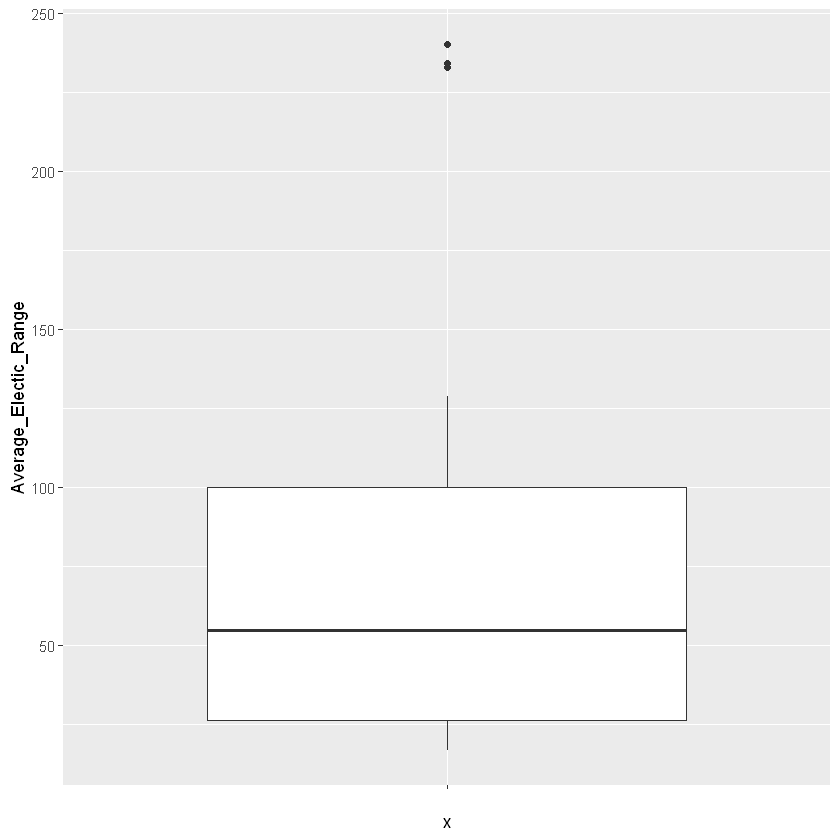

In [403]:
 ggplot(Green_cars5, aes(x = "", y =Average_Electic_Range ))+geom_boxplot()

In [404]:
summary(Green_cars5$Average_Electic_Range)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   26.43   54.92   73.83  100.00  240.18 

# According to the data the average electric range for green cars is arround 74.